In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from graph_analysis import read_pajek
import os
from networkx.drawing.layout import (
    spring_layout, circular_layout, random_layout, shell_layout,
    spiral_layout, spectral_layout, kamada_kawai_layout
)

import igraph as ig
import leidenalg

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [ ]:
def get_layout(G, layout_name):
    if layout_name == 'spring':
        return nx.spring_layout(G, k=1, iterations=50)
    elif layout_name == 'circular':
        return nx.circular_layout(G)
    elif layout_name == 'random':
        return nx.random_layout(G)
    elif layout_name == 'shell':
        return nx.shell_layout(G)
    elif layout_name == 'spiral':
        return nx.spiral_layout(G)
    elif layout_name == 'spectral':
        return nx.spectral_layout(G)
    elif layout_name == 'kamada_kawai':
        return nx.kamada_kawai_layout(G)
    else:
        return nx.spring_layout(G)

def visualize_network(
    G,
    title,
    output_path,
    layout_name='spring',
    node_size=100,
    edge_gray='gray',
    alpha=0.6,
    figsize=(15, 15),
    resolution=1.0 # resolution parameter for Leiden algorithm tells us how big the communities should be
):
    try:
        plt.figure(figsize=figsize)

        # convert to igraph with same nodes & edges
        nodes = list(G.nodes())
        idx_map = {n: i for i, n in enumerate(nodes)}
        edges_idx = [(idx_map[u], idx_map[v]) for u, v in G.edges()]
        ig_g = ig.Graph(n=len(nodes), edges=edges_idx)
        ig_g.vs['name'] = nodes

        #leiden
        partition = leidenalg.find_partition(
            ig_g,
            leidenalg.RBConfigurationVertexPartition,
            resolution_parameter=resolution
        )
        membership = partition.membership
        comm_dict = {}
        for idx, comm_id in enumerate(membership):
            comm_dict.setdefault(comm_id, []).append(idx)
        num_comms = len(comm_dict)

        cmap = plt.cm.get_cmap('Set3', num_comms)
        color_map = {
            nodes[idx]: cmap(comm_id)
            for comm_id, idxs in comm_dict.items()
            for idx in idxs
        }
        node_colors = [color_map[n] for n in nodes]
        edge_colors = [color_map.get(u, edge_gray) for u, v in G.edges()]

        # layout & draw
        pos = get_layout(G, layout_name)
        nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               node_color=node_colors, alpha=alpha)
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors,
                               alpha=alpha/2)
        labels = nx.get_node_attributes(G, 'label')
        if labels:
            nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

        plt.title(f'{title} – {layout_name.capitalize()} ({num_comms} communities)')
        plt.axis('off')

        # save
        dirpath = os.path.dirname(output_path)
        if dirpath:
            os.makedirs(dirpath, exist_ok=True)
        save_path = f"{os.path.splitext(output_path)[0]}_{layout_name}.png"
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        print(f"Created network visualization with {layout_name} layout: {save_path}")

    except Exception as e:
        print(f"Error creating {layout_name} layout visualization for {title}: {e}")


# TDF_time_diff.net

Successfully loaded network with 2696 nodes and 907620 edges


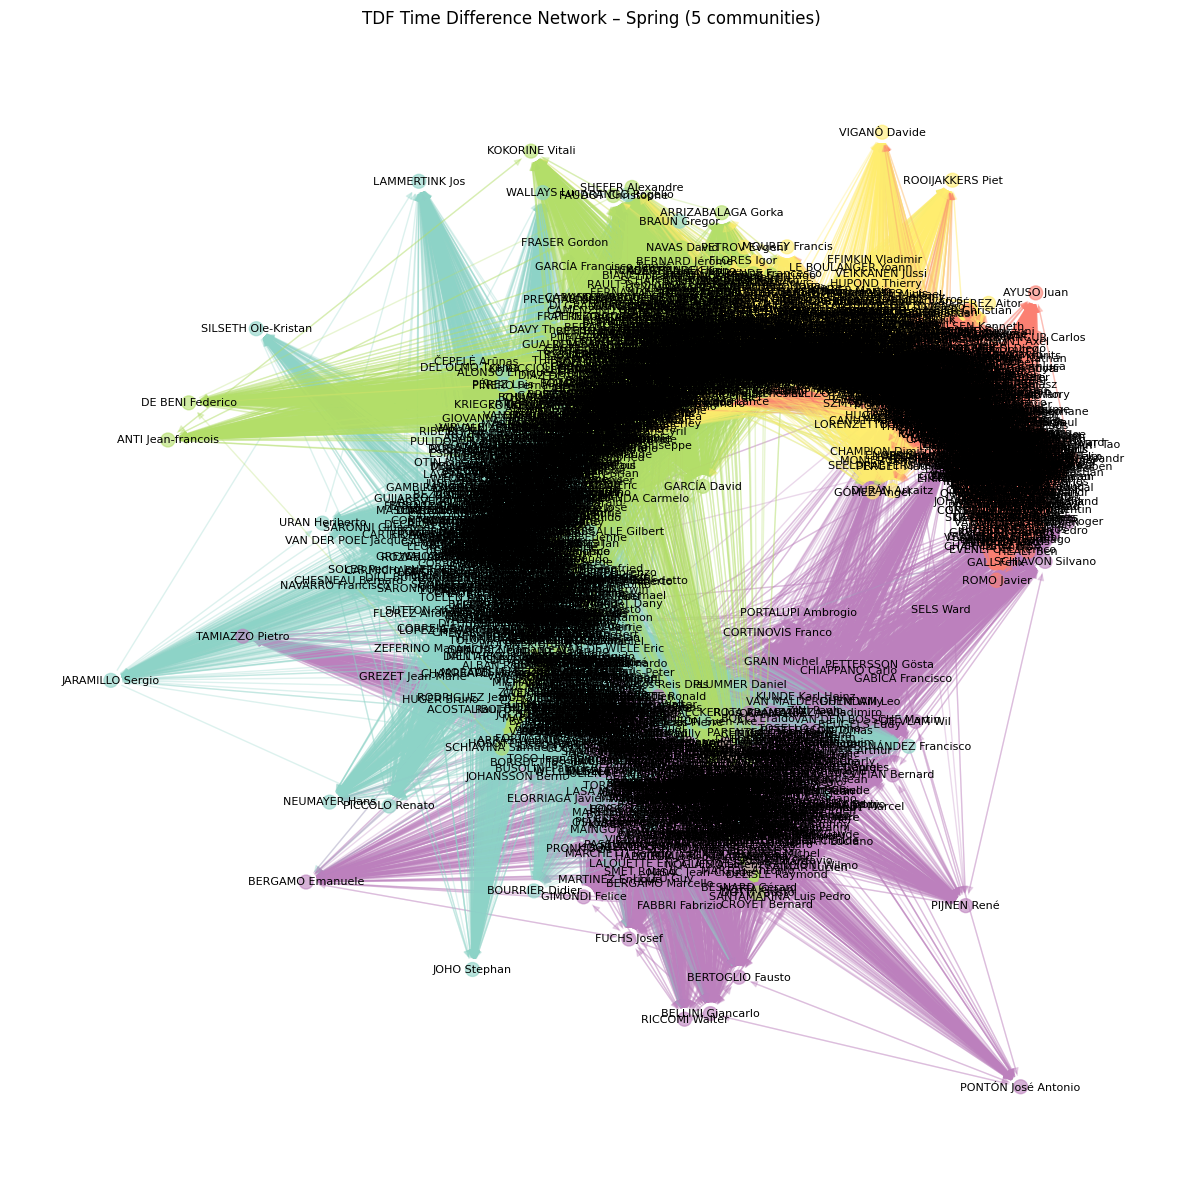

Created network visualization with spring layout: tdf_time_diff_spring.png


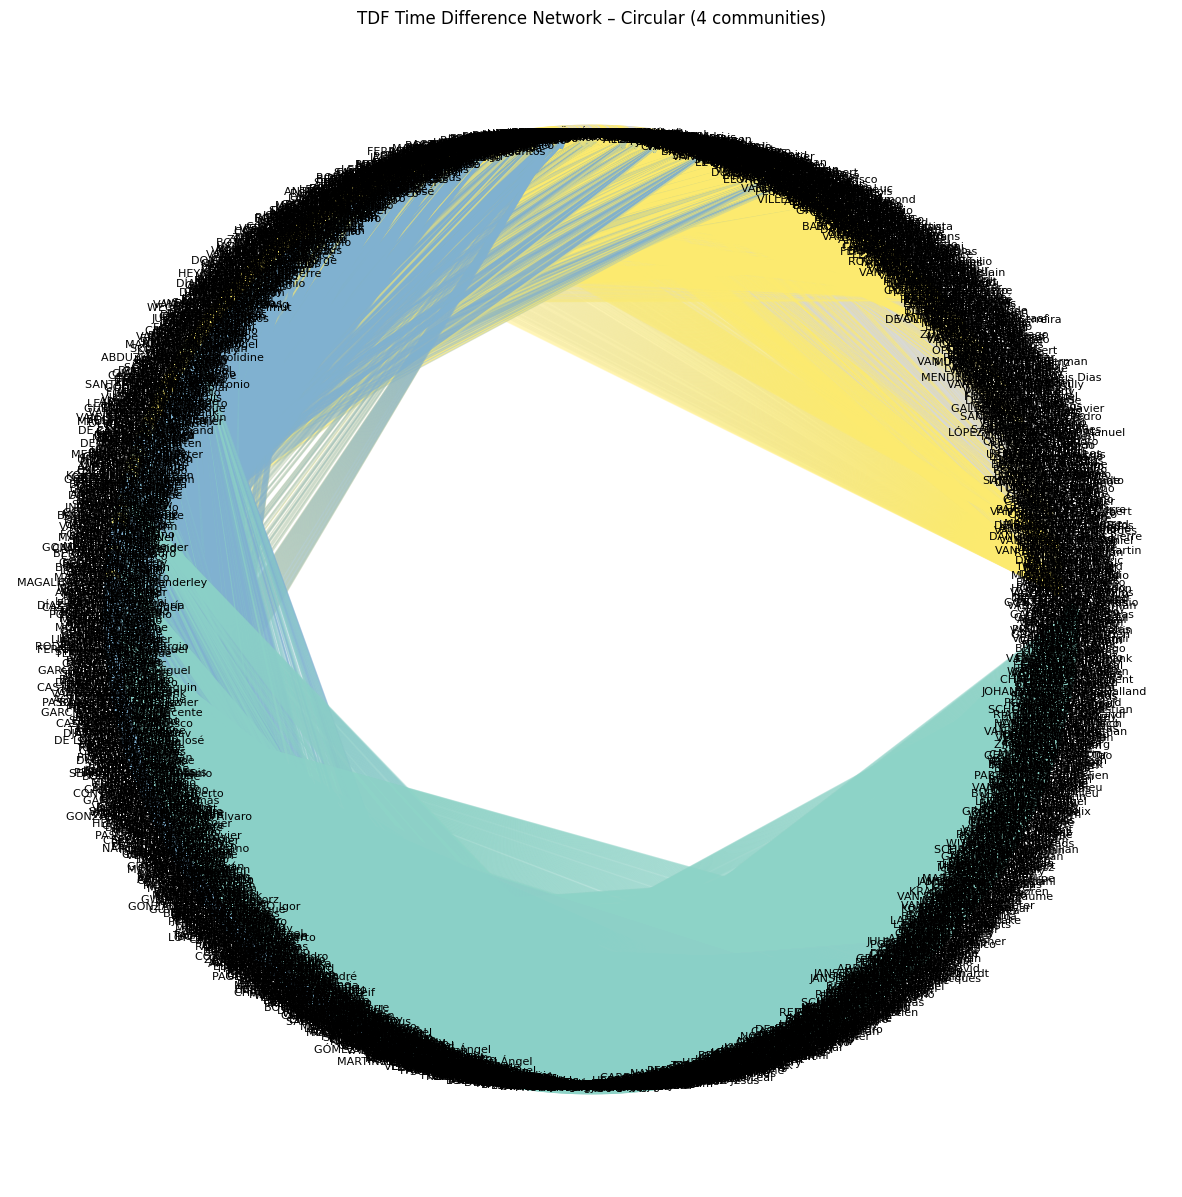

Created network visualization with circular layout: tdf_time_diff_circular.png


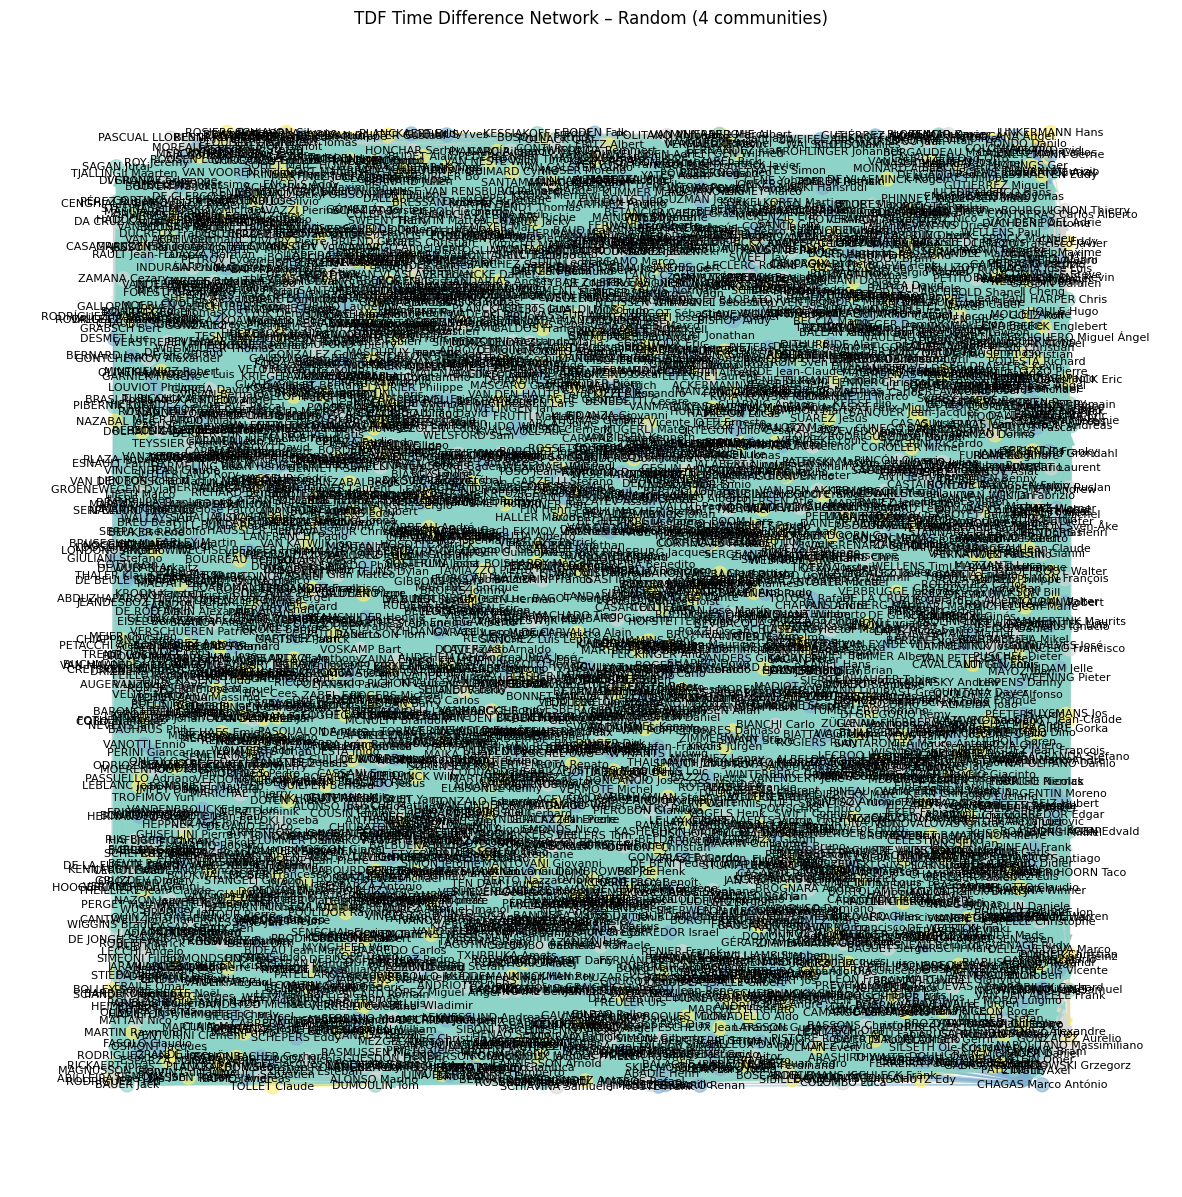

Created network visualization with random layout: tdf_time_diff_random.png


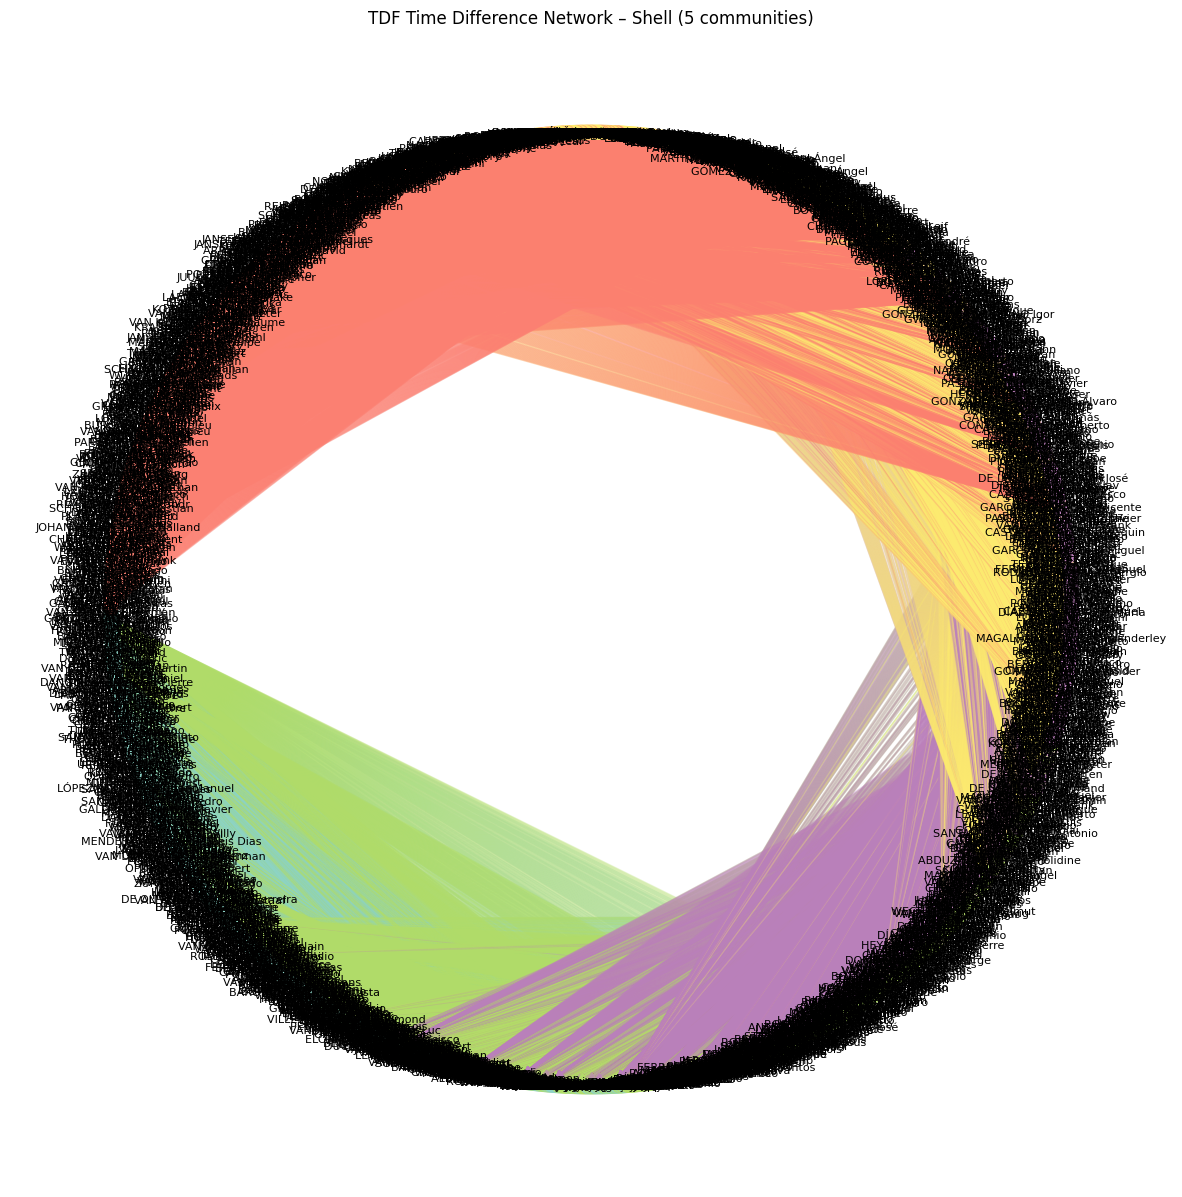

Created network visualization with shell layout: tdf_time_diff_shell.png


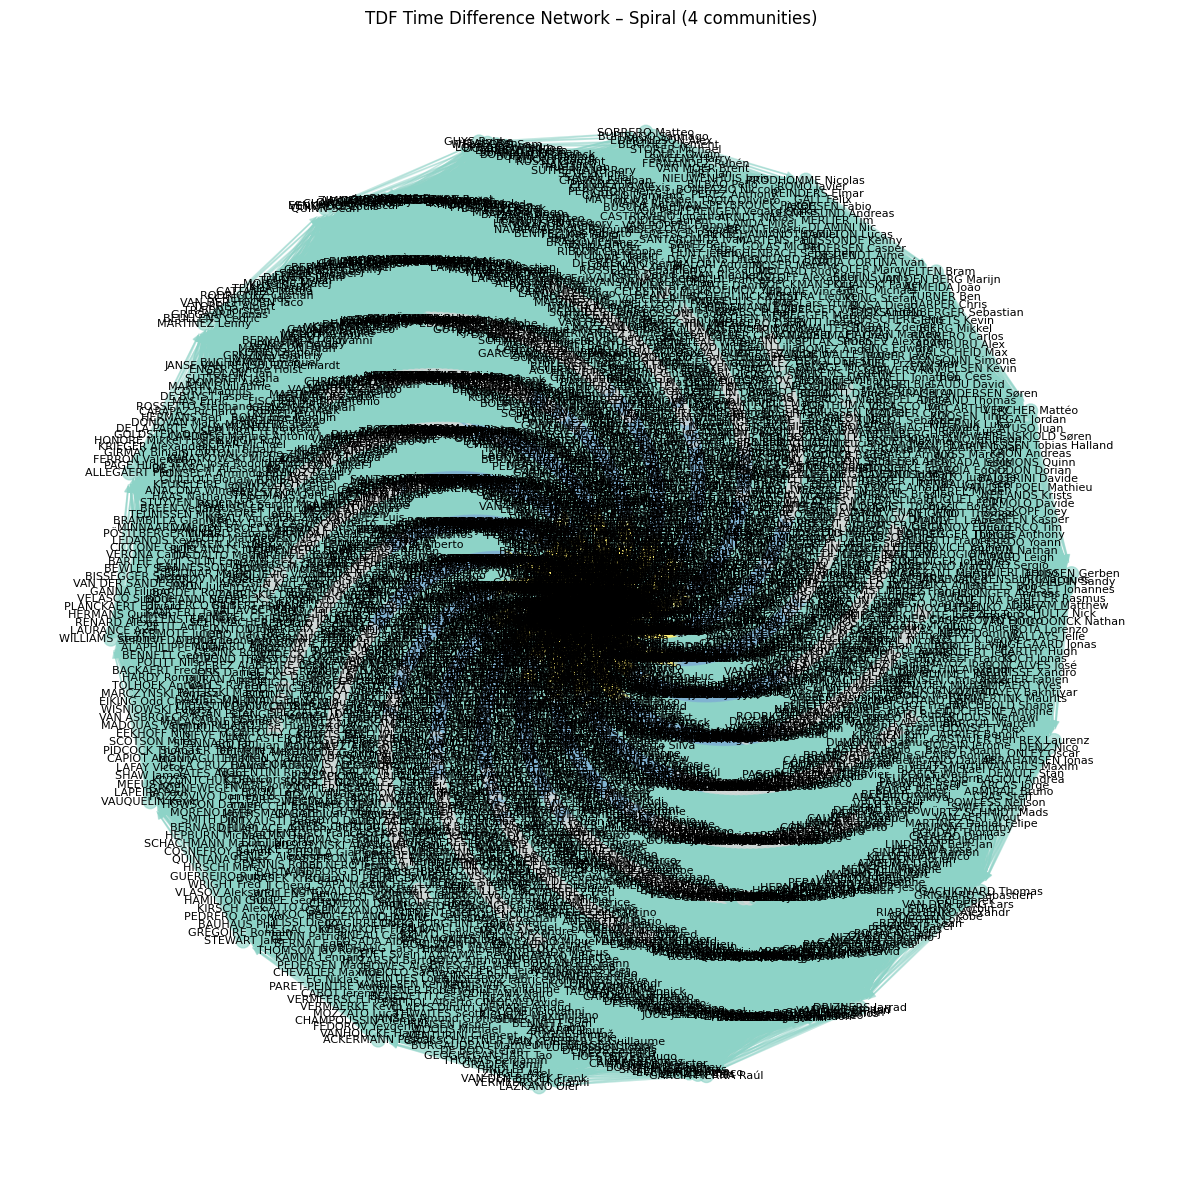

Created network visualization with spiral layout: tdf_time_diff_spiral.png


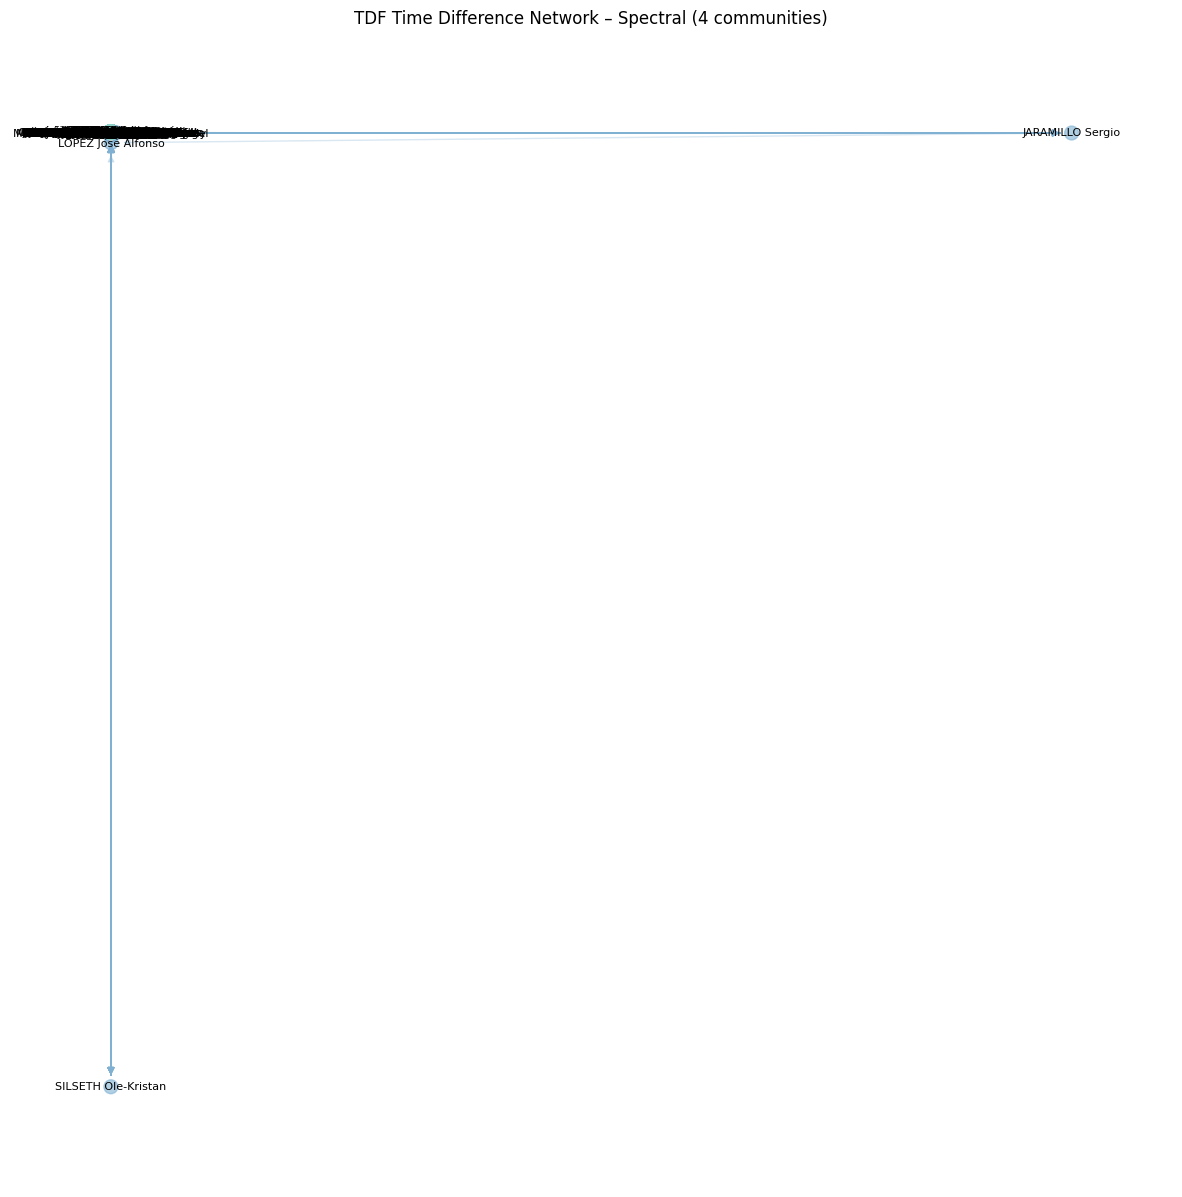

Created network visualization with spectral layout: tdf_time_diff_spectral.png


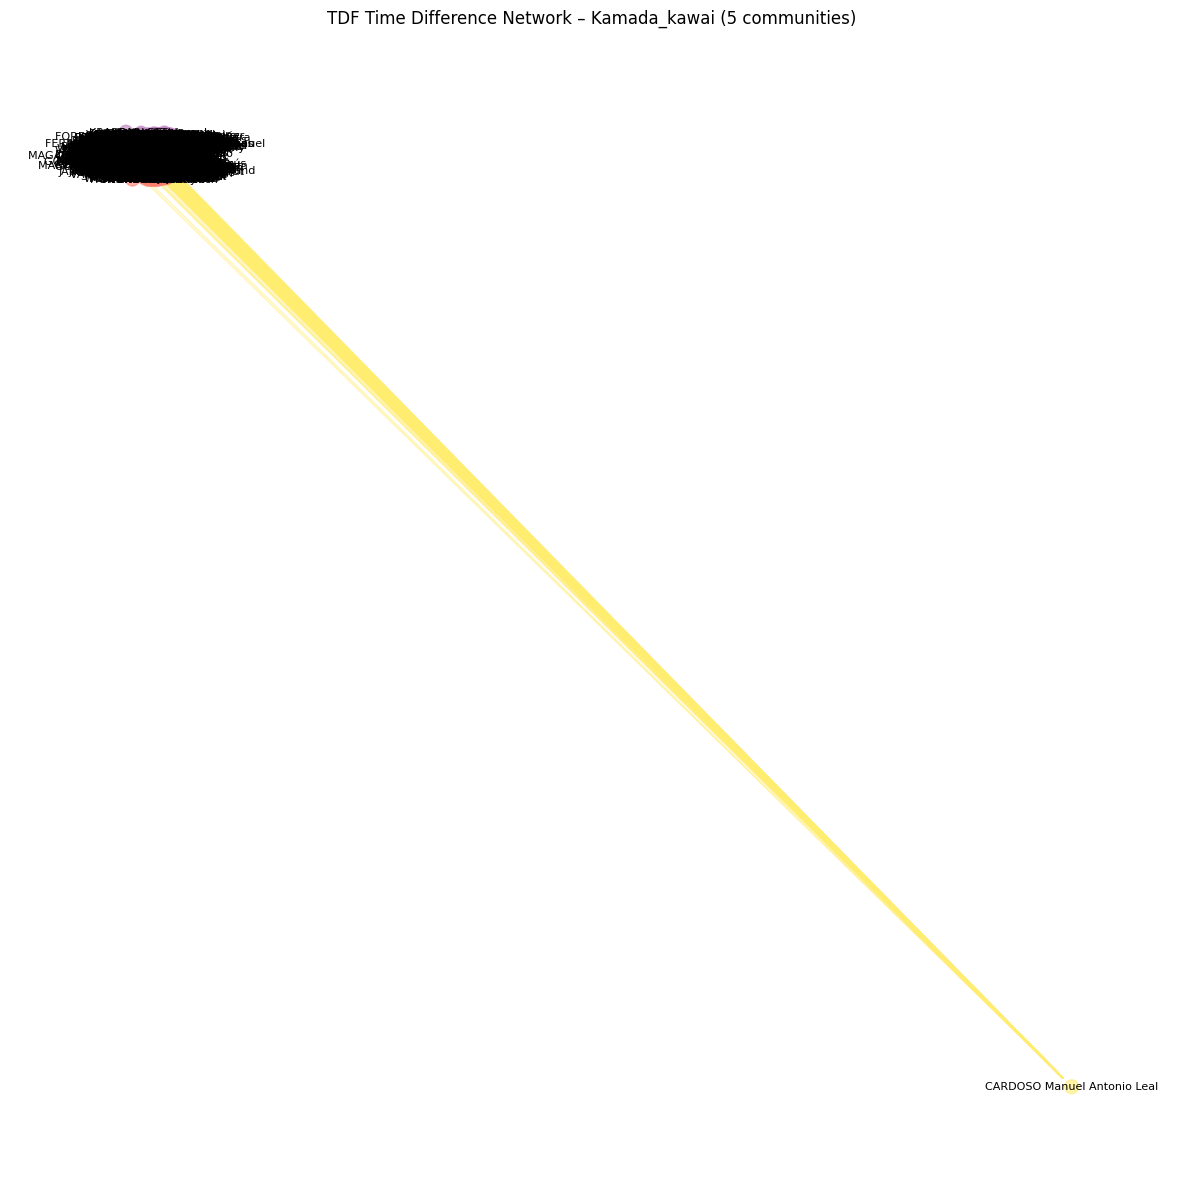

Created network visualization with kamada_kawai layout: tdf_time_diff_kamada_kawai.png


In [5]:
# Load time_diff network
G_time_diff, names = read_pajek("TDF_time_diff", "../smaller_graphs")
print(f"Successfully loaded network with {G_time_diff.number_of_nodes()} nodes and {G_time_diff.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='spring',
    resolution=1
)

# Circular layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='circular',
    resolution=1
)

# Random layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='random',
    resolution=1
)

# Shell layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='shell',
    resolution=1
)

# Spiral layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='spiral',
    resolution=1
)

# Spectral layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='spectral',
    resolution=1
)

# Kamada-Kawai layout
visualize_network(
    G_time_diff,
    'TDF Time Difference Network',
    'tdf_time_diff',
    layout_name='kamada_kawai',
    resolution=1
)

# TDF_normalized_time_diff.net

Successfully loaded network with 2696 nodes and 907620 edges
Successfully loaded network with 2696 nodes and 907620 edges


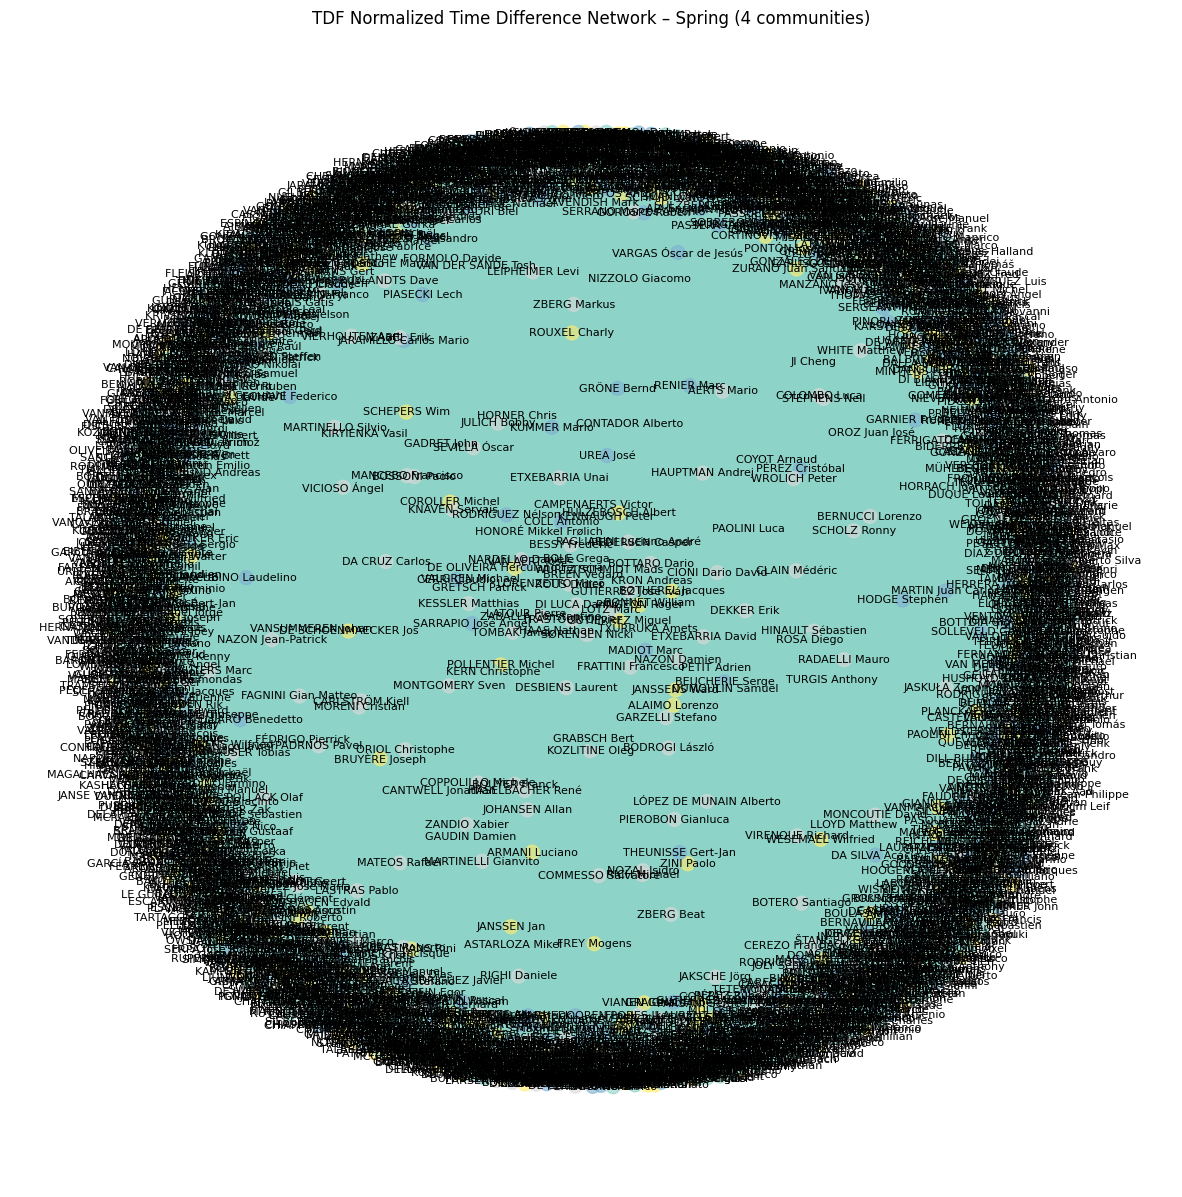

Created network visualization with spring layout: tdf_normalized_time_diff_spring.png


In [ ]:
# ------ MONKEY PATCH -------------
# Load normalized_time_diff networkimport builtins
import builtins
# --- monkey-patch int to accept floaty strings ---
_orig_int = builtins.int
def _patched_int(x, *args):
    try:
        return _orig_int(x, *args)
    except ValueError:
        return _orig_int(float(x))
builtins.int = _patched_int

# -----------------------------------------------


G_normalized_time_diff, names = read_pajek("TDF_normalized_time_diff", "../smaller_graphs")
print(f"Successfully loaded network with {G_normalized_time_diff.number_of_nodes()} nodes "
      f"and {G_normalized_time_diff.number_of_edges()} edges")

# --- un-patch int to avoid side effects ---
builtins.int = _orig_int

print(f"Successfully loaded network with {G_normalized_time_diff.number_of_nodes()} nodes and {G_normalized_time_diff.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='spring',
    resolution=1
)

# Circular layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='circular',
    resolution=1
)

# Random layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='random',
    resolution=1
)

# Shell layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='shell',
    resolution=1
)

# Spiral layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='spiral',
    resolution=1
)

# Spectral layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='spectral',
    resolution=1
)

# Kamada-Kawai layout
visualize_network(
    G_normalized_time_diff,
    'TDF Normalized Time Difference Network',
    'tdf_normalized_time_diff',
    layout_name='kamada_kawai',
    resolution=1
)

# TDF_scaled_time_diff.net

In [ ]:
# TODO: Haven't tried this yet
# Load scaled_time_diff network
G_scaled_time_diff, names = read_pajek("TDF_scaled_time_diff", "../output_graphs")
print(f"Successfully loaded network with {G_scaled_time_diff.number_of_nodes()} nodes and {G_scaled_time_diff.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='spring'
)

# Circular layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='circular'
)

# Random layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='random'
)

# Shell layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='shell'
)

# Spiral layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='spiral'
)

# Spectral layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='spectral'
)

# Kamada-Kawai layout
visualize_network(
    G_scaled_time_diff,
    'TDF Scaled Time Difference Network',
    'tdf_scaled_time_diff',
    layout_name='kamada_kawai'
)

# TDF_points.net

In [ ]:
# TODO: Haven't tried this yet
# Load points network
G_points, names = read_pajek("TDF_points", "../output_graphs")
print(f"Successfully loaded network with {G_points.number_of_nodes()} nodes and {G_points.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='spring'
)

# Circular layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='circular'
)

# Random layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='random'
)

# Shell layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='shell'
)

# Spiral layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='spiral'
)

# Spectral layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='spectral'
)

# Kamada-Kawai layout
visualize_network(
    G_points,
    'TDF Points Network',
    'tdf_points',
    layout_name='kamada_kawai'
)

# TDF_pure_points.net


In [ ]:
# TODO: Haven't tried this yet
# Load pure_points network
G_pure_points, names = read_pajek("TDF_pure_points", "../output_graphs")
print(f"Successfully loaded network with {G_pure_points.number_of_nodes()} nodes and {G_pure_points.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='spring'
)

# Circular layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='circular'
)

# Random layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='random'
)

# Shell layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='shell'
)

# Spiral layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='spiral'
)

# Spectral layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='spectral'
)

# Kamada-Kawai layout
visualize_network(
    G_pure_points,
    'TDF Pure Points Network',
    'tdf_pure_points',
    layout_name='kamada_kawai'
)

# TDF_no_weights.net

In [ ]:
# TODO: Haven't tried this yet
# Load no_weights network
G_no_weights, names = read_pajek("TDF_no_weights", "../output_graphs")
print(f"Successfully loaded network with {G_no_weights.number_of_nodes()} nodes and {G_no_weights.number_of_edges()} edges")

# Spring layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='spring'
)

# Circular layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='circular'
)

# Random layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='random'
)

# Shell layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='shell'
)

# Spiral layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='spiral'
)

# Spectral layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='spectral'
)

# Kamada-Kawai layout
visualize_network(
    G_no_weights,
    'TDF No Weights Network',
    'tdf_no_weights',
    layout_name='kamada_kawai'
)